In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Parameters
data_dir = 'C:\\Users\\baldo\\OneDrive - MSFT\\Desktop\\Deep Learning\\Coconut Tree Dieases Detection\\Training\\Coconut Tree'
image_size = (128, 128)
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(data_dir, 'Val'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3707 images belonging to 5 classes.
Found 930 images belonging to 5 classes.
Found 1161 images belonging to 5 classes.


Epoch 1/20
116/116 [==============================] - 32s 263ms/step - loss: 1.4435 - accuracy: 0.4249 - val_loss: 0.7722 - val_accuracy: 0.6430
Epoch 2/20
116/116 [==============================] - 61s 523ms/step - loss: 0.8014 - accuracy: 0.6409 - val_loss: 0.6385 - val_accuracy: 0.7290
Epoch 3/20
116/116 [==============================] - 29s 252ms/step - loss: 0.6755 - accuracy: 0.7041 - val_loss: 0.6404 - val_accuracy: 0.7699
Epoch 4/20
116/116 [==============================] - 29s 249ms/step - loss: 0.7366 - accuracy: 0.7135 - val_loss: 0.5538 - val_accuracy: 0.8108
Epoch 5/20
116/116 [==============================] - 29s 253ms/step - loss: 0.5353 - accuracy: 0.7842 - val_loss: 0.3809 - val_accuracy: 0.8538
Epoch 6/20
116/116 [==============================] - 31s 264ms/step - loss: 0.4736 - accuracy: 0.8203 - val_loss: 0.3593 - val_accuracy: 0.8860
Epoch 7/20
116/116 [==============================] - 30s 257ms/step - loss: 0.4032 - accuracy: 0.8535 - val_loss: 0.4107 - val_ac

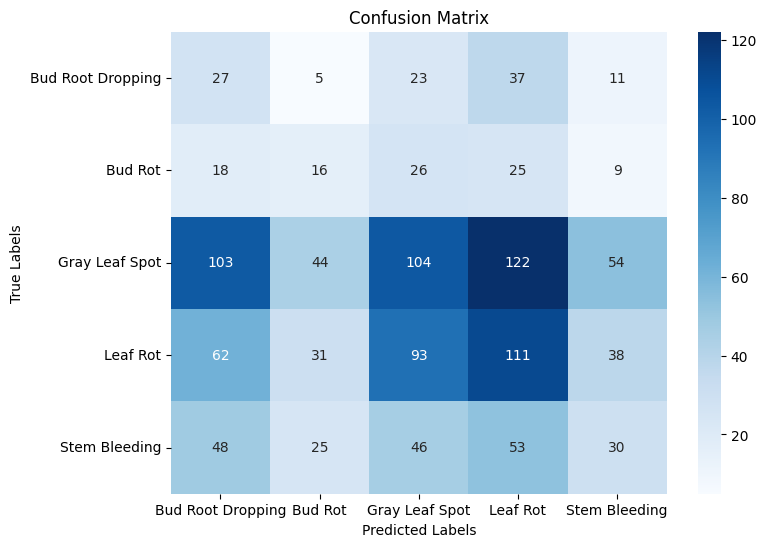

Training and evaluation completed.


In [11]:
# Load pre-trained models
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(5, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vgg16_model = build_model(vgg16_base)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
num_epochs = 20

vgg16_model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    verbose=1
)

# Evaluate models on validation set
y_true = validation_generator.classes
y_pred = vgg16_model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print(report)
print("=" * 80)

# Evaluate models on test set

# y_true_test = test_generator.classes
# y_pred_test = vgg16_model.predict(test_generator)
# y_pred_classes_test = np.argmax(y_pred_test, axis=1)

# report_test = classification_report(y_true_test, y_pred_classes_test, target_names=test_generator.class_indices.keys())
# print(report_test)
# print("=" * 80)
# report_test = classification_report(y_true_test, y_pred_classes_test, target_names=test_generator.class_indices.keys())
confusion = confusion_matrix(y_true_test, y_pred_classes_test)

print(report_test)
print("=" * 80)
print("Confusion Matrix:")
print(confusion)
print("=" * 80)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Training and evaluation completed.")

Epoch 1/20
116/116 [==============================] - 38s 273ms/step - loss: 0.6790 - accuracy: 0.8325 - val_loss: 852.4993 - val_accuracy: 0.0892
Epoch 2/20
116/116 [==============================] - 34s 294ms/step - loss: 0.4519 - accuracy: 0.8773 - val_loss: 6.9132 - val_accuracy: 0.1731
Epoch 3/20
116/116 [==============================] - 30s 260ms/step - loss: 0.1673 - accuracy: 0.9417 - val_loss: 3.9241 - val_accuracy: 0.1731
Epoch 4/20
116/116 [==============================] - 33s 279ms/step - loss: 0.1267 - accuracy: 0.9558 - val_loss: 1.7461 - val_accuracy: 0.4344
Epoch 5/20
116/116 [==============================] - 34s 289ms/step - loss: 0.1074 - accuracy: 0.9625 - val_loss: 1.9627 - val_accuracy: 0.1731
Epoch 6/20
116/116 [==============================] - 31s 269ms/step - loss: 0.1237 - accuracy: 0.9595 - val_loss: 2.0355 - val_accuracy: 0.4624
Epoch 7/20
116/116 [==============================] - 30s 254ms/step - loss: 0.0734 - accuracy: 0.9730 - val_loss: 3.7198 - val_

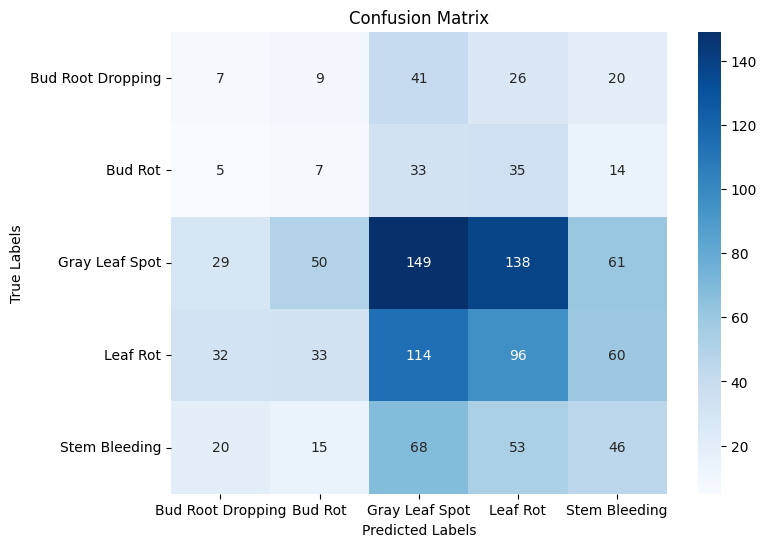

Training and evaluation completed.


In [12]:
# Load pre-trained models
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(5, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
resnet50_model = build_model(resnet50_base)

resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
num_epochs = 20

resnet50_model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    verbose=1
)

# Evaluate models on test set
y_true_test = test_generator.classes
y_pred_test = resnet50_model.predict(test_generator)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)

report_test = classification_report(y_true_test, y_pred_classes_test, target_names=test_generator.class_indices.keys())
print(report_test)
print("=" * 80)

confusion = confusion_matrix(y_true_test, y_pred_classes_test)

print(report_test)
print("=" * 80)
print("Confusion Matrix:")
print(confusion)
print("=" * 80)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Training and evaluation completed.")

Epoch 1/20
116/116 [==============================] - 39s 287ms/step - loss: 0.2884 - accuracy: 0.9080 - val_loss: 21.4141 - val_accuracy: 0.3720
Epoch 2/20
116/116 [==============================] - 58s 501ms/step - loss: 0.1858 - accuracy: 0.9409 - val_loss: 14.0775 - val_accuracy: 0.4806
Epoch 3/20
116/116 [==============================] - 43s 364ms/step - loss: 0.1254 - accuracy: 0.9598 - val_loss: 18.0444 - val_accuracy: 0.3602
Epoch 4/20
116/116 [==============================] - 30s 259ms/step - loss: 0.1243 - accuracy: 0.9620 - val_loss: 16.6683 - val_accuracy: 0.4065
Epoch 5/20
116/116 [==============================] - 32s 278ms/step - loss: 0.1539 - accuracy: 0.9593 - val_loss: 14.9242 - val_accuracy: 0.3978
Epoch 6/20
116/116 [==============================] - 32s 276ms/step - loss: 0.1429 - accuracy: 0.9649 - val_loss: 17.3370 - val_accuracy: 0.3720
Epoch 7/20
116/116 [==============================] - 31s 269ms/step - loss: 0.0633 - accuracy: 0.9781 - val_loss: 10.8666 -

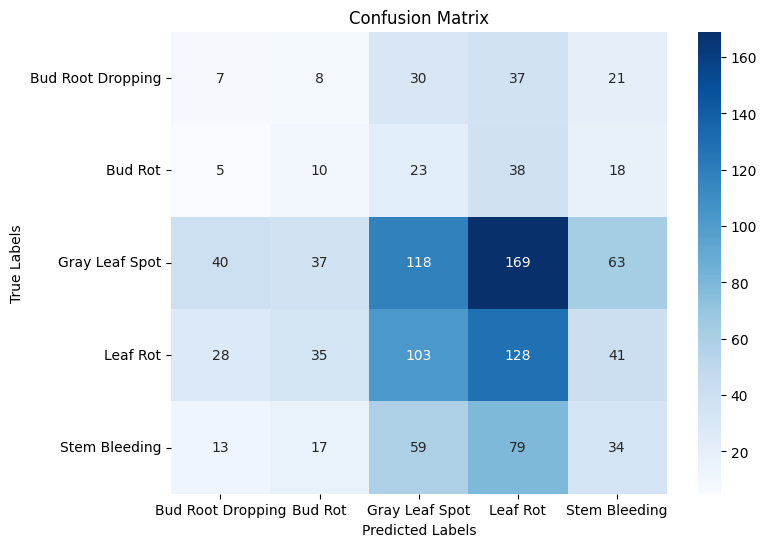

Training and evaluation completed.


In [13]:
# Load pre-trained models
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(5, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
mobilenet_model = build_model(mobilenet_base)

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
num_epochs = 20

mobilenet_model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    verbose=1
)

# Evaluate models on test set
y_true_test = test_generator.classes
y_pred_test = mobilenet_model.predict(test_generator)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)

report_test = classification_report(y_true_test, y_pred_classes_test, target_names=test_generator.class_indices.keys())
print(report_test)
print("=" * 80)

confusion = confusion_matrix(y_true_test, y_pred_classes_test)

print(report_test)
print("=" * 80)
print("Confusion Matrix:")
print(confusion)
print("=" * 80)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Training and evaluation completed.")